In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as H

import sys
import os

separator = os.sep
fullpath = os.getcwd().split(separator)
source_path = separator.join(fullpath[0:-2])
sys.path.append(source_path)

from cmb_footprint import footprint

Populating the interactive namespace from numpy and matplotlib


# Overview

This tool is meant to show the footprints of different surveys/experiments on the same plot. This is to help see which experiments have overlapping footprints in order to facilitate cross-correlation studies. Footprints are either read from a Healpix file or generated through patch positions/sizes. All footprints that we have are listed in the configuration file. 

The background for the footprint image can be loaded from the configuration file or input as a Healpix file. If it loaded from the configuration file, it may need to be downloaded.

# Example

## Maps

Here we show a basic example of how to run the code. The ACT and SPT footprints are taken from a Healpix file which we generated from released hitmaps. The POLARBEAR, BICEP2, and QUIET footprints are generated from patch location and size definitions, though each uses a different way of describing the patch (see the config file).

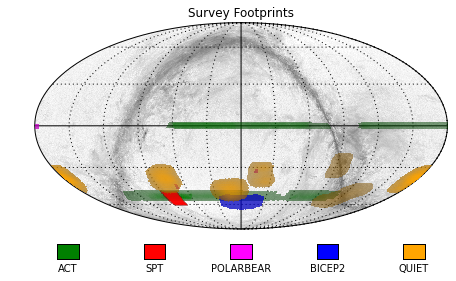

In [9]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg') 

fp.superimpose_survey('ACT', color='green')
fp.superimpose_survey('SPT', color='red')
fp.superimpose_survey('POLARBEAR', color='magenta')
fp.superimpose_survey('BICEP2', color='blue')
fp.superimpose_survey('QUIET-Q', color='orange', label='QUIET')

## Outlines

In addition to plotting maps of the different regions, we can plot the outlines or contours of the different surveys. Outlines can be constructed for experiments whose regions are constructed from the information in the configuration file. Contours can be drawn for experiments whose suvey region is input as a Healpix file. The contour is drawn so that it contains a user defined fraction of observation time for the experiment.

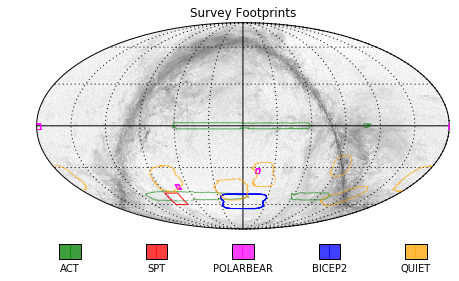

In [5]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg') 

fp.superimpose_survey_contour('ACT', color='green')
fp.superimpose_survey_contour('SPT', color='red')
fp.superimpose_survey_outline('POLARBEAR', color='magenta')
fp.superimpose_survey_outline('BICEP2', color='blue', label='BICEP2')
fp.superimpose_survey_contour('QUIET-Q', color='orange', label='QUIET', frac=0.90)

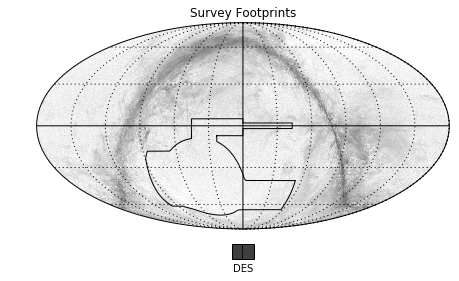

In [6]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg') 

fp.superimpose_survey_outline('DES-polygon', color='black', label='DES')

# Options

Here we will go over all the different options that can be specified when generating the footprint.

## Projection

The first option is the "projection" option. The SurveyStack class takes as an input a string describing the projection. Here we show the same plot, but in two different projections.

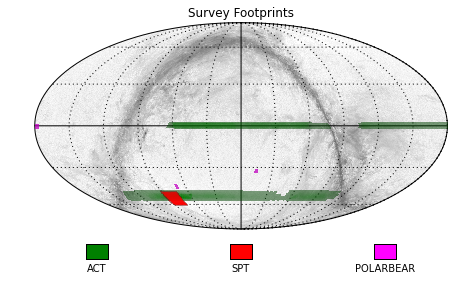

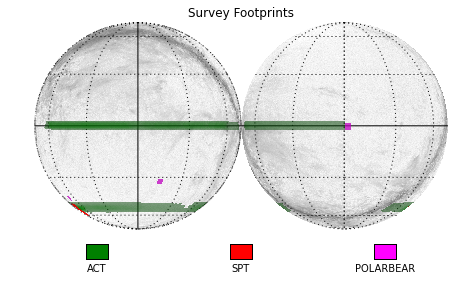

In [12]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=1, projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg')
fp.superimpose_survey('ACT', color='green')
fp.superimpose_survey('SPT', color='red')
fp.superimpose_survey('POLARBEAR', color='magenta')
fp2 = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=2, projection='orthographic', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg')
fp2.superimpose_survey('ACT', color='green')
fp2.superimpose_survey('SPT', color='red')
fp2.superimpose_survey('POLARBEAR', color='magenta')

## Coordinate System of Plot

A second option that can be specified is "coord_plot". It takes either 'C', 'E', or 'G' specifying the coordinate system to use when plotting the footprints. Here is the same footprint, but in different coordinate systems.

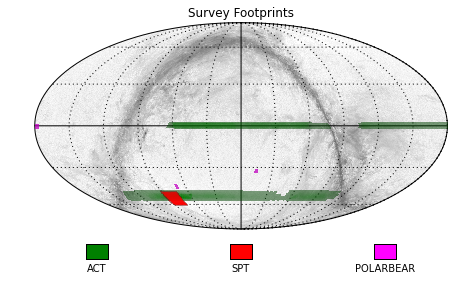

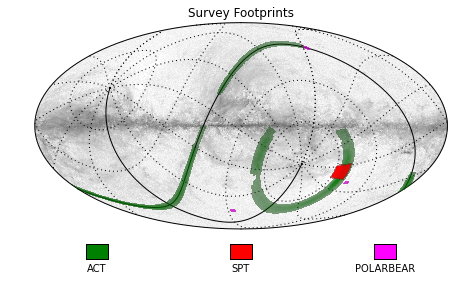

In [13]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=1, projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg')
fp.superimpose_survey('ACT', color='green')
fp.superimpose_survey('SPT', color='red')
fp.superimpose_survey('POLARBEAR', color='magenta')
fp2 = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=2, projection='mollweide', coord_plot='G', rot=[0,0],
                           config='../footprint.cfg')
fp2.superimpose_survey('ACT', color='green')
fp2.superimpose_survey('SPT', color='red')
fp2.superimpose_survey('POLARBEAR', color='magenta')

## Rotation

A third option is to apply a rotation, "rot". This option is used the same as it is used in the Healpy plotting routines.

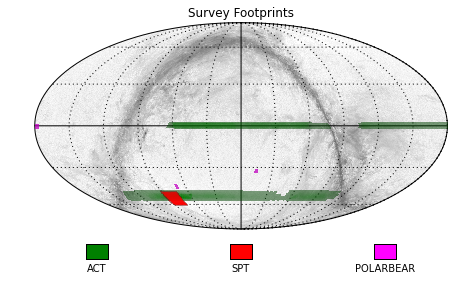

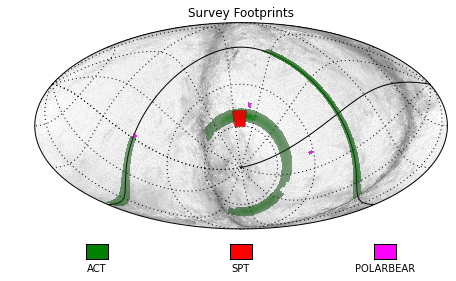

In [14]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=1, projection='mollweide', coord_plot='C', rot=[0,0],
                           config='../footprint.cfg')
fp.superimpose_survey('ACT', color='green')
fp.superimpose_survey('SPT', color='red')
fp.superimpose_survey('POLARBEAR', color='magenta')
fp2 = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=2, projection='mollweide', coord_plot='C', rot=[80,-60],
                           config='../footprint.cfg')
fp2.superimpose_survey('ACT', color='green')
fp2.superimpose_survey('SPT', color='red')
fp2.superimpose_survey('POLARBEAR', color='magenta')

## Partial Map

If you input the 'partialmap', then you also need to input values to 'latra' and 'lonra' to specify the range in longitude and latitude to plot. The projection in this case will always be using H.cartview since it is the only Healpy routine that accepts partial map options.

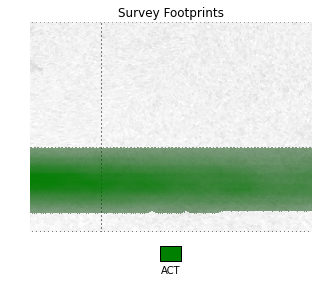

In [8]:
fp = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=1, coord_plot='C', rot=[0,0], partialmap=True,
                            latra=[-60,-30], lonra=[0,40], config='../footprint.cfg')
fp.superimpose_survey('ACT', color='green')
fp.superimpose_survey('SPT', color='red')
fp.superimpose_survey('POLARBEAR', color='magenta')

## Other Options

There are other options that we will just describe here. If you input the background as a Healpix map instead of referring to an entry in a string, you should input a coordinate system to "coord_bg" so the code know what coordinate system the map is in. The default value is 'G'. Similarly, it you input a footprint as a Healpix map instead of reading from the config file, you should input a value to 'coord_in' so it know what the coordinate system the input footprint is in. The default value for this is 'C'.

A figure number can be input when generating an instance of the class, but I don't think it matters. It keeps hold of the matplotlib.figure.Figure instance that is generated.

The 'config' option should specify the path to the configuration file. You can also set 'download_config' option to True to have the configuration file downloaded from LAMBDA whenever the code is run.

The 'map_path' option should be set to tell the code where the downloaded files should be stored. If the option is not set, a 'maps/' sub-directory in the directory of the footprint.py code is created.